In [50]:
import pandas as pd
import uproot as up
import numpy as np
fname = "L1_ETA"

fts = ["eventNumber", fname, "Lb_BKGCAT"]
with up.open(rare_sim + ":DTT1520me/DecayTree") as f:
    df = f.arrays(fts, library="pd")
    df = df.sample(frac=1) # Randomly shuffle
    df.set_index("eventNumber", inplace=True)
    df = df[~df.index.duplicated(keep='first')]
    # Remove duplicate events
df['Category'] = np.where(df['Lb_BKGCAT'].isin([10, 50]), 1, 0)
df.drop('Lb_BKGCAT', axis=1, inplace=True)
df.head()

,L1_ETA,Category
eventNumber,,
92210,2.668017,1
530673,3.980211,1
1406520,2.426757,1
1391545,2.869321,1
947116,2.636613,1


In [51]:
nfts = ["eventNumber", fname]
with up.open(rare_real + ":DTT1520me/DecayTree") as f:
    rf = f.arrays(nfts, library="pd")
    rf = rf.sample(frac=1) # Randomly shuffle
    rf.set_index("eventNumber", inplace=True)
    rf = rf[~rf.index.duplicated(keep='first')]
    # Remove duplicate events
rf['Category'] = 0

In [52]:
df = df[df['Category'] == 0]
rf = rf.sample(frac=df.shape[0]/rf.shape[0])

In [56]:
ks_2samp(rf[fname], df[fname])

KstestResult(statistic=0.02328866114833794, pvalue=1.3261820730727397e-07)

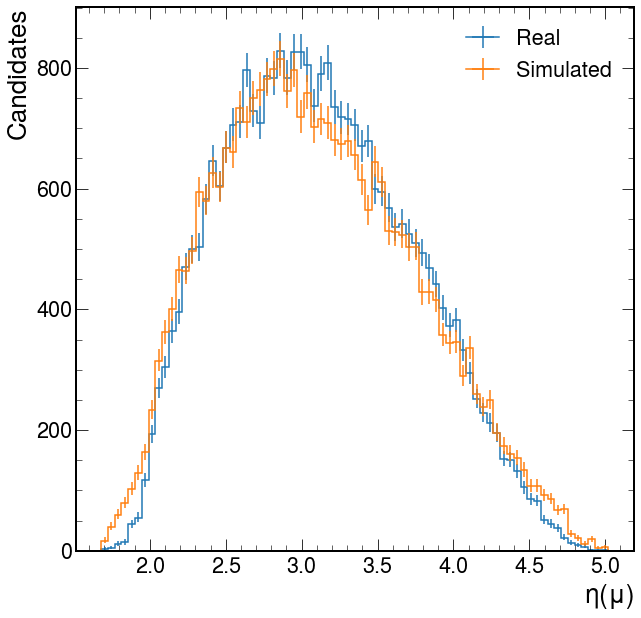

In [55]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from scipy.stats import ks_2samp

h, bins = np.histogram(rf[fname], bins=75)
h1, _ = np.histogram(df[fname], bins=bins)

fig, ax = plt.subplots(1, 1)
hep.histplot([h, h1], bins=bins, yerr=True, ax=ax, label=['Real', 'Simulated'], histtype='step')
plt.ylabel('Candidates')
plt.xlabel(r'$\eta(\mu)$')
plt.legend()
plt.savefig('images/ManualCuts/L1_ETA_Dist.png')
plt.show()

In [1]:
from create_data import create_csv

norm_sim = "/disk/moose/lhcb/djdt/Lb2L1520mueTuples/MCNorm/2016MD/halfSampleFeb22/job246-CombDVntuple-MCNorm-15144059-S28r2Restrip-firstHalf-2016MD-pKmumu-PF__PreselectedV1.root"
norm_real = "/disk/moose/lhcb/djdt/Lb2L1520mueTuples/realDataNorm/2016MD/halfSampleFeb22/job228-CombDVntuple-collision-firstHalf-2016MD-pKmumu-PF__PreselectedV1.root"

rare_sim = "/disk/moose/lhcb/djdt/Lb2L1520mueTuples/MC/2016MD/fullSampleOct2021/job207-CombDVntuple-15314000-MC2016MD_Full-pKmue-MC.root"
rare_real = "/disk/moose/lhcb/djdt/Lb2L1520mueTuples/realData/2016MD/halfSampleOct2021/blindedTriggeredL1520Selec-collision-firstHalf2016MD-pKmue_Fullv9.root"

In [4]:
kwargs = {
    'ver': '8.0.1',
    'sim_path': norm_sim,
    'actual_path': norm_real,
    'decay_tree_name': ':DTT1520mm/DecayTree',
    'preselect': False,
    'preselect_path': 'preselection.txt',
    'equalise_event_numbers': False,
    'dropnan': False,
    'restrict_mass': None,#([4500, 5200], [5800, 6500]),
    'train_fraction': 0.6,
    'val_fraction': 0.2,
    'test_fraction': 0.2,
    'isNormalisation': True,
    'DileptonQ2': True,
    'request': 'request.txt',
    'random_seed': 0
}

create_csv(kwargs)

/disk/homedisk/home/user211/project/create_data.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_features = user_features.append(add_row, ignore_index=True)


INFO: Reading in data from simulated tree
INFO: Simulated data manipulation complete


/home/user211/envs/scientific/lib64/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/user211/envs/scientific/lib64/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Output to CSV: data_files/8.0.1/all.csv
Generating metadata file...
INFO: Metadata file generated at outputs/csv_metadata/8.0.1.txt
